In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential2
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA",
	"training_date": "current", # values: earlier, current
	"mode": "evidential2", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": True,
	"learning_rate": 1e-4,
    "use_cloud_mask": True,
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
elif config['mode'] == 'evidential2':
	patchesHandler = PatchesHandlerEvidential2()
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': 
			exp = 6
			repetition_id = 0
			exp = 9

		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 17
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'PA', 'training_date': 'current', 'mode': 'evidential2', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': True, 'learning_rate': 0.0001, 'use_cloud_mask': True, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:396 in __init__()- list(self.date_ids): [0]
ic| dataset.py:417 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'PA',
 'training_date': 'current',
 'mode': 'evidential2',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': True,
 'learning_rate': 0.0001,
 'use_cloud_mask': True,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [9]:
exp

17

In [10]:
manager.setExperimentPath()
manager.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


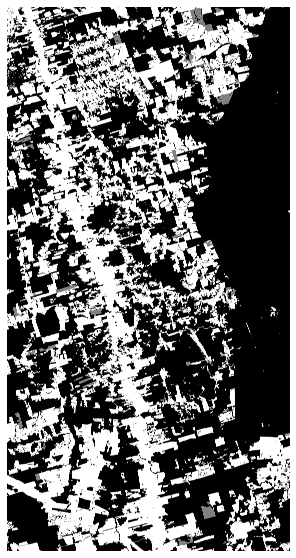

In [13]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [14]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [15]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [16]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([3848933,   24058, 4282809], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([3946794,  155444, 4053562], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([3763825,  334071, 4057904], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6200673,  140180, 1814947], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([3907717,   93438, 4154645], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4353232,   51100, 3751468], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([4994674,   64045, 3097081], dtype=int64))
Set 8 (array([0, 2], dtype=uint8), array([8144807,   10993], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5157160,  137968, 2860672], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3475674,   83519, 4596607], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4649101,  107494, 3399205], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), array([7750220

In [17]:

manager.label_mask.dtype

dtype('uint8')

In [18]:

manager.getLabelCurrentDeforestation()

In [19]:

manager.loadInputImage()

ic| dataset.py:445 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [20]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

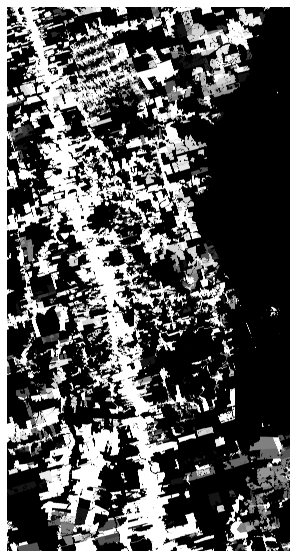

In [21]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

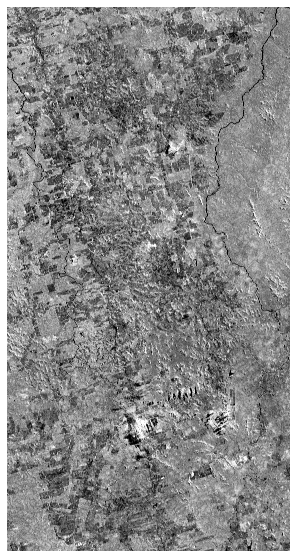

In [22]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [23]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([100903598,   1838508,  60373894], dtype=int64))

In [24]:
# manager.maskNoDataAsNotConsideredClass()

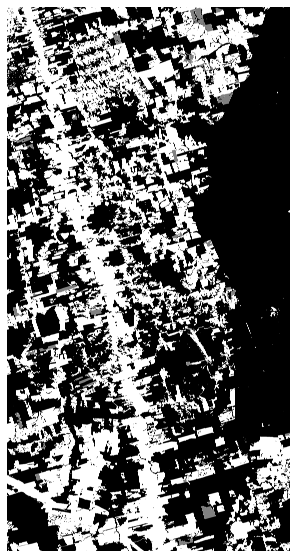

In [25]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [26]:

manager.getImageChannels()

ic| base.py:104 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:106 in getImageChannels()- self.channels: 21


In [27]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


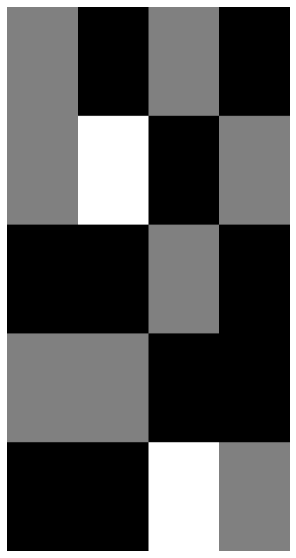

In [28]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [29]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [30]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([38253046,   801988, 26191366], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9179787,  270914, 6860899], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([53470765,   765606, 27321629], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([100903598,   1838508,  60373894], dtype=int64))


In [31]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 3))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 3))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 3))

train unique percentage [0.586 0.012 0.401]
val unique [0.563 0.017 0.421]
test unique [0.656 0.009 0.335]


In [32]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (17730, 9200, 2)
    im_idx.dtype: dtype('uint16')


In [33]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (110896, 2)
    coords.dtype: dtype('uint16')


In [34]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:122 in trainTestSplit()
    self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [35]:
if config["training"] == True:
    manager.label_mask.shape

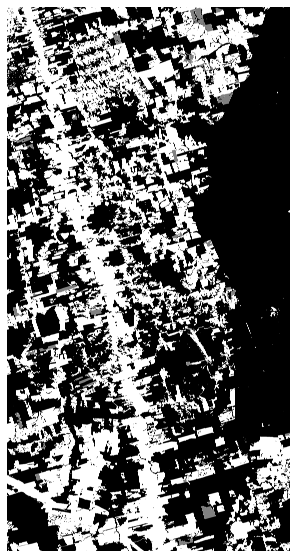

In [36]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [37]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [38]:
if config["training"] == True:
    print(manager.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [39]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (3753, 3) validation samples:  (1032, 3)


In [40]:
if config["training"] == True:
    inputSnipShow = True

In [41]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [42]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [43]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [45]:
manager.dataset.bands

10

ic

[2280 4750    0]
coord [2280 4750    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.29747355
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3196338


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


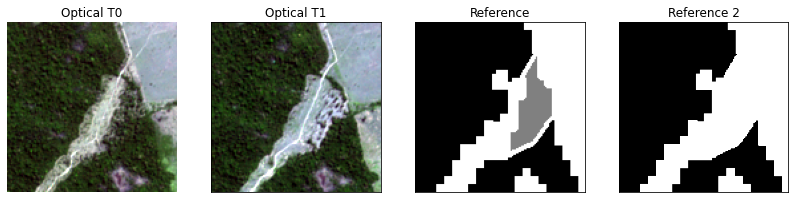

In [46]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.2714837
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]
coord [ 114 5928    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


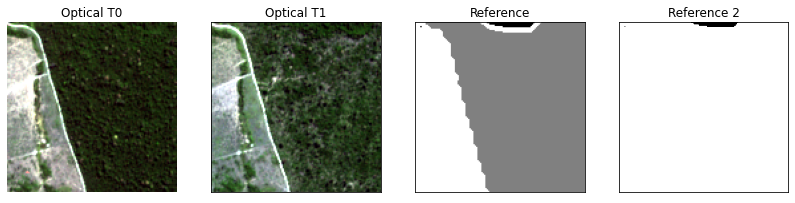

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.44512972
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.45241854


[ 874 1026    0]
coord [ 874 1026    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


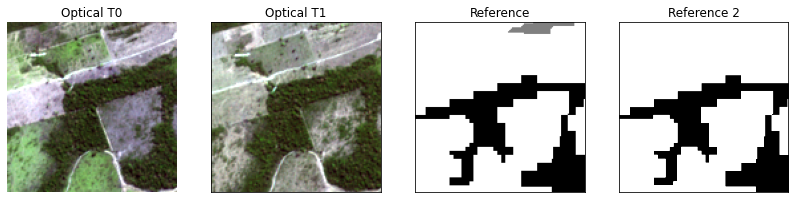

In [48]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


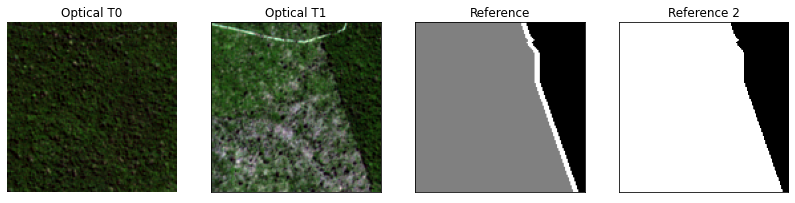

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


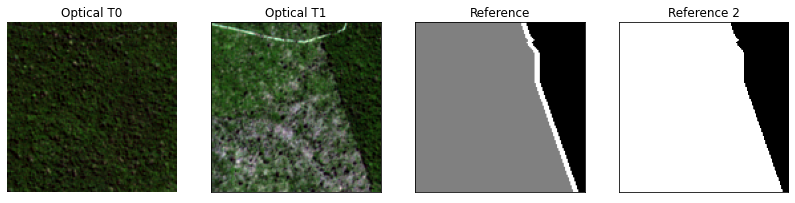

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [51]:
if config["training"] == True:
    manager.getGenerators()


In [52]:
if config["training"] == True:
    manager.fixChannelNumber()

In [53]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/PA/exp17


In [54]:
if config["training"] == True:
    print(manager.channels)

21


In [55]:
if config["training"] == True:
    print(manager.image_stack.shape)

(17730, 9200, 21)


In [56]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [57]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


351/351 [==============================] - 32s 91ms/step - loss: 0.4659 - accuracy: 0.4558 - val_loss: 0.4722 - val_accuracy: 0.5146

Epoch 00001: val_loss improved from 0.47242 to 0.47217, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp17/models\resunet_0.h5
New best val loss. Val loss: 0.47217. Early stop count: 0
Epoch: 3
Anneling Coeficient [0.2]
351/351 [==============================] - 32s 91ms/step - loss: 0.4658 - accuracy: 0.4555 - val_loss: 0.4722 - val_accuracy: 0.5106

Epoch 00001: val_loss did not improve from 0.47217
Early stop count: 1
Epoch: 4
Anneling Coeficient [0.3]
351/351 [==============================] - 31s 89ms/step - loss: 0.4658 - accuracy: 0.4557 - val_loss: 0.4718 - val_accuracy: 0.5107

Epoch 00001: val_loss improved from 0.47217 to 0.47179, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp17/models\resunet_0.h5
New best val loss. Val loss: 0.47179. Early stop count: 0
Epoch: 5
Anneling Coeficient [0.4]
351/351 [=======

In [58]:
if config["training"] == True and config["mode"] != 'evidential2':
    manager.plotHistory()


In [59]:
repetition_id = 0

In [60]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [61]:
manager.image_stack.shape

(17730, 9200, 21)

In [62]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [63]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [64]:
manager.image_stack.shape

(17730, 9200, 21)

In [65]:
manager.setPadding()

-30.0 -16.0


In [66]:
from tensorflow.keras.models import Model, load_model, Sequential
import src.network as network
from src.evidential_learning import DirichletLayer
import src.evidential_learning as evidential

def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', 
        compile=False, custom_objects={"DirichletLayer": DirichletLayer })
    class_n = 2
    
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = self.network_architecture(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = class_n, dropout_seed = None, 
            training=self.config['dropout_training'], last_activation='relu')

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        self.patchesHandler.class_n = class_n

        with tf.device('/cpu:0'):
            tm = 0
            print('time: ', tm)


            # Recinstructing predicted map
            start_test = time.time()
            '''
            args_network = {'patch_size_rows': patch_size_rows,
                'patch_size_cols': patch_size_cols,
                'c': c,
                'nb_filters': nb_filters,
                'class_n': class_n,
                'dropout_seed': inference_times}
            '''
            self.alpha_reconstructed = self.patchesHandler.infer(
                    new_model, self.image1_pad, self.h, self.w, 
                    num_patches_x, num_patches_y, patch_size_rows, 
                    patch_size_cols, classes_mode = True)
            prob_reconstructed, self.u_reconstructed = evidential.alpha_to_probability_and_uncertainty(
                self.alpha_reconstructed)
            ts_time =  time.time() - start_test

            if self.config["save_probabilities"] == True:
                np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
            else:
                self.prob_rec = prob_reconstructed
            

            del prob_reconstructed
    del self.image1_pad

In [67]:

import types
manager.infer = types.MethodType(infer, manager)


In [68]:
manager.infer()

ic| 1757020877.py:15 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id

)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/PA/exp17/models/resunet_0.h5'


Dropout training mode: False
time:  0
alpha.shape (17760, 9216, 2)
S.shape (17760, 9216)
K 2
u.shape (17760, 9216)
belief.shape (17760, 9216, 2)


In [69]:
manager.prob_rec.shape

(17760, 9216, 2)

In [70]:
manager.loadPredictedProbabilities()

In [71]:
manager.prob_rec.shape

(17760, 9216, 2)

In [72]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [73]:
manager.prob_rec.shape

(17760, 9216, 2)

In [74]:
manager.getMeanProb()

In [75]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 4.539375e-05
    np.mean(value): 0.39738455
    np.max(value): 0.9998638


In [76]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (17760, 9216, 2)


(17760, 9216, 2)

In [77]:
manager.unpadMeanProb()

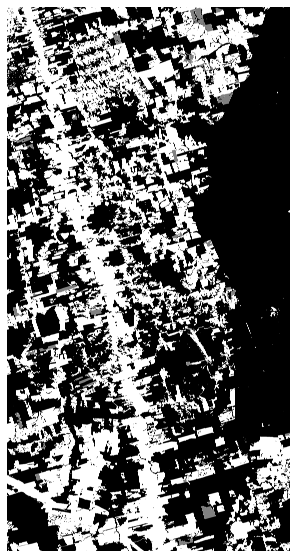

In [78]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [79]:
manager.squeezeLabel()

In [80]:
manager.mean_prob.shape

(17730, 9200, 2)

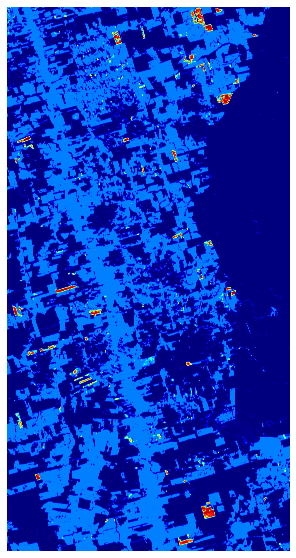

In [81]:
manager.logger.plotFigure(manager.mean_prob[...,1], 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [82]:
print(manager.label_mask.shape)

(17730, 9200)


In [83]:
# manager.getLabelTest()

In [84]:
# manager.getMAP()

In [85]:
manager.prob_rec.shape

(17760, 9216, 2)

In [86]:
# manager.preprocessProbRec()
# print(manager.prob_rec.shape)

In [87]:
manager.prob_rec.shape

(17760, 9216, 2)

In [88]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 4.539375e-05
    np.mean(value): 0.39738455
    np.max(value): 0.9998638


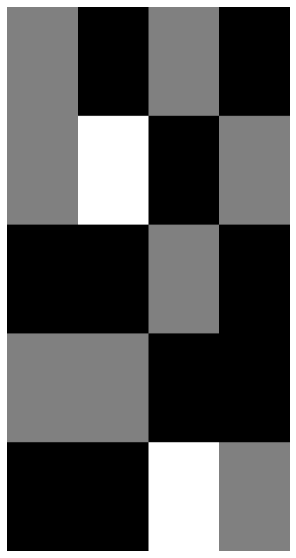

In [89]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [90]:
manager.getLabelCurrentDeforestation()

In [91]:
manager.classes_mode

True

In [92]:
manager.applyProbabilityThreshold()

(17730, 9200, 2)


In [93]:
manager.setMeanProbNotConsideredAreas()


In [94]:
manager.getTestValues()

ic| base.py:424 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:433 in getTestValues()- predicted_test.shape: (54236371,)


In [95]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0, 1], dtype=int8), array([161334162,   1781838], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0, 1], dtype=int8), array([161486455,   1629545], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0, 1], dtype=int8), array([162963707,    152293], dtype=int64))


In [96]:
manager.calculateMetrics()

ic| base.py:477 in calculateMetrics()
    self.f1: 81.66
    self.precision: 86.74
    self.recall: 77.14


In [97]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| multioutput.py:241 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)
ic| multioutput.py:247 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9433039,)
ic| base.py:488 in calculateMetricsValidation()
    f1_val: 85.3
    precision_val: 84.17
    recall_val: 86.47
    mAP_val: 87.44


In [98]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [99]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


In [100]:
manager.getErrorMask()

(array([0, 1], dtype=int16), array([162451557,    664443], dtype=int64))


In [101]:
manager.getErrorMaskToShowRGB()

[0 1]


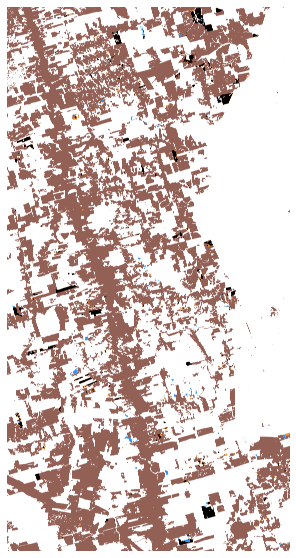

In [102]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [103]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [104]:
manager.setUncertainty()

In [105]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [106]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 9.07875e-05
    np.mean(value): 0.20523201
    np.max(value): 0.5


In [107]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.022448005
    np.max(value): 0.5


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

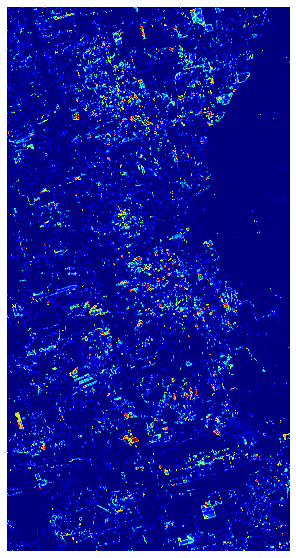

In [108]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



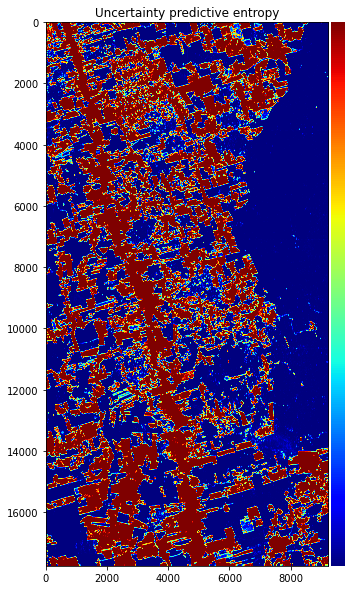

In [109]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [110]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:528 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:529 in getTestValues2()
    self.mask_amazon_ts.shape: (17730, 9200)
ic| base.py:533 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:541 in getTestValues2()
    self.error_mask_test.shape: (54159317,)


In [142]:
import src.plot as _plt

def plotCropSample(self, manager):
    uncertainty_vlims = [np.min(manager.uncertainty_to_show), np.max(manager.uncertainty_to_show)]

    self.plotCropSampleFlag = True
    if self.plotCropSampleFlag == True:
        ic(manager.dataset.previewLims1, manager.dataset.previewLims2)
        lims = manager.dataset.previewLims1
        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = manager.dataset.previewLims2
        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims1, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        save_name = 'output/figures/{}PredictSampleUncertainty1_exp{}.png'.format(
            manager.dataset.__class__.__name__, str(manager.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims2, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        save_name = 'output/figures/{}PredictSampleUncertainty2_exp{}.png'.format(
            manager.dataset.__class__.__name__, str(manager.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims2, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + manager.dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar.png', dpi=150, bbox_inches='tight')


In [143]:

import types
manager.logger.plotCropSample = types.MethodType(plotCropSample, manager.logger)


ic| 146458515.py:8 in plotCropSample()
    manager.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    manager.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| 146458515.py:10 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| 146458515.py:12 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


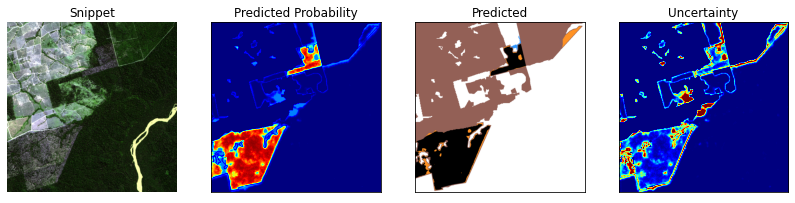

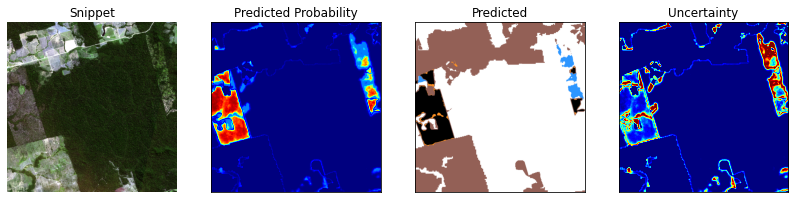

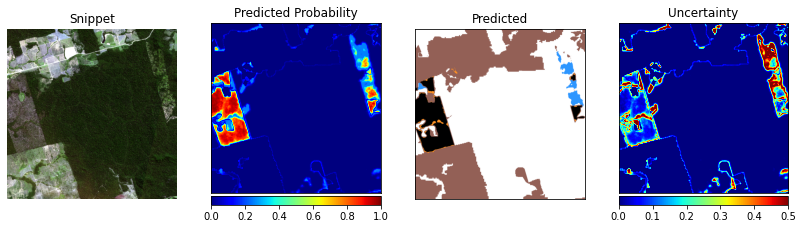

In [144]:
manager.logger.plotCropSample(manager)

In [112]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [113]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [114]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

In [115]:
# manager.logger.plotCropSampleT0T1(manager)

In [116]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): 9.07875e-05
    np.mean(value): 0.031163096
    np.max(value): 0.5


In [117]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [118]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [119]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [120]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [121]:
manager.config['uncertainty_method'] = 'evidential2'

In [122]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "evidential2":
                self.threshold_list = list(np.linspace(np.min(self.uncertainty)+0.0000001, np.max(self.uncertainty)-0.005, 11))[1:]

    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [123]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)


Get precision-recall threshold

In [124]:

manager.getUncertaintyAAValues()

ic| 4112614954.py:65 in getUncertaintyAAValues()
    self.uncertainty.shape: (54159317,)
    self.label_mask_current_deforestation_test.shape: (54159317,)


[0.04958179875007636, 0.09907271000006787, 0.1485636212500594, 0.1980545325000509, 0.2475454437500424, 0.29703635500003395, 0.34652726625002545, 0.39601817750001694, 0.44550908875000844, 0.495]
threshold 0.04958179875007636


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (6142728,)
    predicted_test_classified_incorrect.shape: (6142728,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6142728
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6142728
    len(label_mask_current_deforestation_test): 54159317


[1.         0.95616291 0.16381968 0.1134196  0.83747272 0.73315119
 0.04067471]
threshold 0.09907271000006787


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4776803,)
    predicted_test_classified_incorrect.shape: (4776803,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4776803
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4776803
    len(label_mask_current_deforestation_test): 54159317


[0.9978946  0.96806629 0.35019698 0.0881991  0.78235281 0.65987026
 0.05151687]
threshold 0.1485636212500594


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3947269,)
    predicted_test_classified_incorrect.shape: (3947269,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3947269
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3947269
    len(label_mask_current_deforestation_test): 54159317


[0.99065415 0.9678374  0.46287123 0.07288255 0.73096988 0.59126106
 0.06084351]
threshold 0.1980545325000509


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3309924,)
    predicted_test_classified_incorrect.shape: (3309924,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3309924
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3309924
    len(label_mask_current_deforestation_test): 54159317


[0.98310089 0.96551473 0.53811573 0.06111458 0.68220245 0.52690961
 0.07043661]
threshold 0.2475454437500424


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2759404,)
    predicted_test_classified_incorrect.shape: (2759404,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2759404
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2759404
    len(label_mask_current_deforestation_test): 54159317


[0.97418839 0.96248613 0.59635694 0.05094976 0.6315362  0.46005039
 0.0813495 ]
threshold 0.29703635500003395


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2285983,)
    predicted_test_classified_incorrect.shape: (2285983,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2285983
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2285983
    len(label_mask_current_deforestation_test): 54159317


[0.95983043 0.95877592 0.6424361  0.04220849 0.58617183 0.3907475
 0.09260293]
threshold 0.34652726625002545


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1895856,)
    predicted_test_classified_incorrect.shape: (1895856,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1895856
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1895856
    len(label_mask_current_deforestation_test): 54159317


[0.93718559 0.95454961 0.67890058 0.03500517 0.5608322  0.32017877
 0.10147681]
threshold 0.39601817750001694


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1590344,)
    predicted_test_classified_incorrect.shape: (1590344,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1590344
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1590344
    len(label_mask_current_deforestation_test): 54159317


[0.91547247 0.95040472 0.70914235 0.02936418 0.54269497 0.24509338
 0.10806291]
threshold 0.44550908875000844


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1344165,)
    predicted_test_classified_incorrect.shape: (1344165,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1344165
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1344165
    len(label_mask_current_deforestation_test): 54159317


[0.8936423  0.94697984 0.73712145 0.02481872 0.53153874 0.1544998
 0.11148752]
threshold 0.495


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1120864,)
    predicted_test_classified_incorrect.shape: (1120864,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1120864
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1120864
    len(label_mask_current_deforestation_test): 54159317


[0.86976046 0.94335675 0.76780248 0.02069568 0.54815124 0.01911589
 0.11035706]


In [125]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:670 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (54159317,)
    self.label_mask_current_deforestation_test.shape: (54159317,)


threshold 0.04958179875007636
(54159317,) (54159317,)
cm_audited [[53421695        0]
 [    5540   732082]]
[1.         0.99248938]
threshold 0.09907271000006787
(54159317,) (54159317,)
cm_audited [[53421150      545]
 [    8521   729101]]
[0.99925306 0.98844801]
threshold 0.1485636212500594
(54159317,) (54159317,)
cm_audited [[53418474     3221]
 [   11346   726276]]
[0.99558463 0.98461814]
threshold 0.1980545325000509
(54159317,) (54159317,)
cm_audited [[53414872     6823]
 [   14177   723445]]
[0.99065685 0.98078013]
threshold 0.2475454437500424
(54159317,) (54159317,)
cm_audited [[53410040    11655]
 [   17145   720477]]
[0.98408074 0.97675639]
threshold 0.29703635500003395
(54159317,) (54159317,)
cm_audited [[53401863    19832]
 [   20375   717247]]
[0.97309379 0.97237745]
threshold 0.34652726625002545
(54159317,) (54159317,)
cm_audited [[53388131    33564]
 [   23844   713778]]
[0.95508883 0.9676745 ]
threshold 0.39601817750001694
(54159317,) (54159317,)
cm_audited [[53373398    

ic| base.py:676 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[1.        , 0.99248938],
                                  [0.99925306, 0.98844801],
                                  [0.99558463, 0.98461814],
                                  [0.99065685, 0.98078013],
                                  [0.98408074, 0.97675639],
                                  [0.97309379, 0.97237745],
                                  [0.95508883, 0.9676745 ],
                                  [0.93633597, 0.9629946 ],
                                  [0.91616562, 0.95872954],
                                  [0.89243578, 0.9538978 ]])


cm_audited [[53336889    84806]
 [   34006   703616]]
[0.89243578 0.9538978 ]


In [126]:
manager.setPlotLimsForUncertaintyAA()

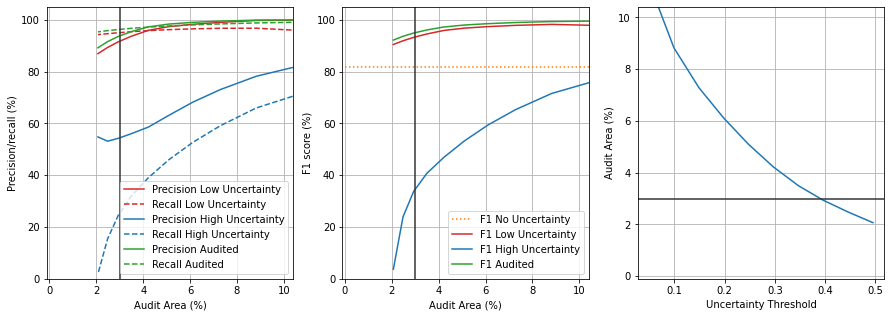

In [127]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [128]:
from scipy import optimize  

def getOptimalUncertaintyThreshold(self, AA = 0.03, bounds = None):

    def getAAFromUncertaintyThreshold(threshold): 
        print(threshold)
        metrics_values2 = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, [threshold])
        return np.abs(AA - metrics_values2[:,3].squeeze())
    if bounds is None:
        bounds = (np.min(self.uncertainty) + 0.0015, np.max(self.uncertainty)-0.0015)
    
    ic(bounds)
    minimum = optimize.minimize_scalar(getAAFromUncertaintyThreshold, 
        method='bounded', bounds=bounds, tol=0.0001)
    self.threshold_optimal = minimum.x
    ic(self.threshold_optimal)

In [129]:

import types

manager.getOptimalUncertaintyThreshold = types.MethodType(getOptimalUncertaintyThreshold, manager)


In [131]:
manager.getOptimalUncertaintyThreshold(bounds = (np.min(manager.uncertainty)+0.0000001, np.max(manager.uncertainty)-0.01))

ic| 2231348037.py:14 in getOptimalUncertaintyThreshold()
    bounds: (9.088750008484349e-05,

 0.49)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.18721951707675644
threshold 0.18721951707675644


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3440776,)
    predicted_test_classified_incorrect.shape: (3440776,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3440776
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3440776
    len(label_mask_current_deforestation_test): 54159317


[0.98473212 0.9660863  0.52341036 0.06353064 0.69310206 0.54111956
 0.068225  ]
0.30287137042332835
threshold 0.30287137042332835


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2235156,)
    predicted_test_classified_incorrect.shape: (2235156,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2235156
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2235156
    len(label_mask_current_deforestation_test): 54159317


[0.95753529 0.95827152 0.64713227 0.04127002 0.58204443 0.38260605
 0.09383117]
0.3743481466534281
threshold 0.3743481466534281


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1715149,)
    predicted_test_classified_incorrect.shape: (1715149,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1715149
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1715149
    len(label_mask_current_deforestation_test): 54159317


[0.92462359 0.95222445 0.69643666 0.03166859 0.55068955 0.27891754
 0.10543353]
0.41852322376990025
threshold 0.41852322376990025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1473209,)
    predicted_test_classified_incorrect.shape: (1473209,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1473209
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1473209
    len(label_mask_current_deforestation_test): 54159317


[0.90592463 0.94872494 0.72189821 0.0272014  0.53529351 0.20687817
 0.11015589]
0.3871853904880185
threshold 0.3871853904880185


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1639533,)
    predicted_test_classified_incorrect.shape: (1639533,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1639533
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1639533
    len(label_mask_current_deforestation_test): 54159317


[0.91912258 0.95110986 0.7041059  0.03027241 0.5458867  0.25896712
 0.10702593]
0.3934520843874851
threshold 0.3934520843874851


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1604415,)
    predicted_test_classified_incorrect.shape: (1604415,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1604415
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1604415
    len(label_mask_current_deforestation_test): 54159317


[0.91653001 0.95057632 0.7077175  0.02962399 0.54351576 0.24910322
 0.1077572 ]
0.3890583632772187
threshold 0.3890583632772187


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1628883,)
    predicted_test_classified_incorrect.shape: (1628883,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1628883
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1628883
    len(label_mask_current_deforestation_test): 54159317


[0.91829659 0.95094096 0.70518368 0.03007577 0.54538446 0.25606417
 0.10722927]
0.39001986926991833
threshold 0.39001986926991833


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1623531,)
    predicted_test_classified_incorrect.shape: (1623531,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623531
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623531
    len(label_mask_current_deforestation_test): 54159317


[0.91789947 0.95085812 0.70574359 0.02997695 0.54500208 0.25454125
 0.10733843]
0.3913308587881276
threshold 0.3913308587881276


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1616268,)
    predicted_test_classified_incorrect.shape: (1616268,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1616268
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1616268
    len(label_mask_current_deforestation_test): 54159317


[0.91738048 0.95073557 0.70651363 0.02984284 0.54436819 0.25244092
 0.10749045]
0.38993560124432886
threshold 0.38993560124432886


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1623976,)
    predicted_test_classified_incorrect.shape: (1623976,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623976
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1623976
    len(label_mask_current_deforestation_test): 54159317


[0.91793192 0.95087079 0.70569885 0.02998516 0.54502999 0.25465855
 0.10733117]
0.38969697986719526
threshold 0.38969697986719526


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1625284,)
    predicted_test_classified_incorrect.shape: (1625284,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1625284
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1625284
    len(label_mask_current_deforestation_test): 54159317


[0.91802605 0.95088895 0.70557955 0.03000931 0.54507566 0.25498316
 0.10730132]
0.38945305003560377
threshold 0.38945305003560377


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1626615,)
    predicted_test_classified_incorrect.shape: (1626615,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1626615
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1626615
    len(label_mask_current_deforestation_test): 54159317


[0.91812665 0.95090754 0.70541416 0.03003389 0.54525176 0.25543769
 0.10727593]
0.3897660606354627
threshold 0.3897660606354627


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1624900,)
    predicted_test_classified_incorrect.shape: (1624900,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624900
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624900
    len(label_mask_current_deforestation_test): 54159317


[0.91799728 0.95088598 0.70561344 0.03000222 0.54507036 0.25488928
 0.10731059]
0.3898006960678549
threshold 0.3898006960678549


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1624715,)
    predicted_test_classified_incorrect.shape: (1624715,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624715
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624715
    len(label_mask_current_deforestation_test): 54159317


[0.91798401 0.95088505 0.70562565 0.02999881 0.54507948 0.25485538
 0.10731576]
0.3898340351828669
threshold 0.3898340351828669


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1624520,)
    predicted_test_classified_incorrect.shape: (1624520,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624520
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624520
    len(label_mask_current_deforestation_test): 54159317
ic| 2231348037.py:18 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.3898006960678549


[0.91797013 0.95088128 0.70564734 0.02999521 0.54505892 0.25479672
 0.10731961]


In [132]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.3898006960678549
threshold 0.3898006960678549


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1624715,)
    predicted_test_classified_incorrect.shape: (1624715,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624715
    len(label_mask_current_deforestation_test): 54159317
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624715
    len(label_mask_current_deforestation_test): 54159317


[0.91798401 0.95088505 0.70562565 0.02999881 0.54507948 0.25485538
 0.10731576]
threshold 0.3898006960678549
(54159317,) (54159317,)


ic| base.py:813 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999881]),
                     'UEO': array([0.10731576]),
                     'f1': 81.66,
                     'f1_H': array([0.34731937]),
                     'f1_L': array([0.93414492]),
                     'precision_H': array([0.54507948]),
                     'precision_L': array([0.91798401]),
                     'recall_H': array([0.25485538]),
                     'recall_L': array([0.95088505]),
                     'recall_Ltotal': array([0.70562565])}
ic| base.py:814 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.95090784]),
                             'precision': array([0.93859014]),
                             'recall': array([0.96355315])}


cm_audited [[53375193    46502]
 [   26884   710738]]
[0.93859014 0.96355315]


{'metrics': {'precision_L': array([0.91798401]),
  'recall_L': array([0.95088505]),
  'recall_Ltotal': array([0.70562565]),
  'AA': array([0.02999881]),
  'precision_H': array([0.54507948]),
  'recall_H': array([0.25485538]),
  'UEO': array([0.10731576]),
  'f1_L': array([0.93414492]),
  'f1_H': array([0.34731937]),
  'f1': 81.66},
 'metrics_audited': {'precision': array([0.93859014]),
  'recall': array([0.96355315]),
  'f1': array([0.95090784])},
 'exp': 17}

In [133]:
print("A")

A
